<a href="https://colab.research.google.com/github/Toomishe/Multi-Stage-Classification-of-Retinal-OCT-using-Multi-Scale-Ensemble-Deep-Architecture/blob/main/Binary_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING PYTHON LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import *
from keras.models import *
import os
import seaborn as sns
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.densenet import preprocess_input
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from pickle import dump

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
import random
from PIL import Image
import os

import random
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd




# BINARY CLASSIFICATION

In [ ]:
#Load model wIthout classifier/fully connected layers
base_model = tf.keras.applications.DenseNet201(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling='max',
    classes=2,
    classifier_activation=None  ,
)

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in base_model.layers:
    layer.trainable = False
base_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                     

                                                                                                  
 conv2_block3_concat (Concatena  (None, None, None,   0          ['conv2_block2_concat[0][0]',    
 te)                            160)                              'conv2_block3_2_conv[0][0]']    
                                                                                                  
 conv2_block4_0_bn (BatchNormal  (None, None, None,   640        ['conv2_block3_concat[0][0]']    
 ization)                       160)                                                              
                                                                                                  
 conv2_block4_0_relu (Activatio  (None, None, None,   0          ['conv2_block4_0_bn[0][0]']      
 n)                             160)                                                              
                                                                                                  
 conv2_blo

 n)                             128)                                                              
                                                                                                  
 conv3_block1_1_conv (Conv2D)   (None, None, None,   16384       ['conv3_block1_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block1_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, None, None,   0          ['conv3_block1_1_bn[0][0]']      
 n)                             128)                                                              
          

 conv3_block5_0_relu (Activatio  (None, None, None,   0          ['conv3_block5_0_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv3_block5_1_conv (Conv2D)   (None, None, None,   32768       ['conv3_block5_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block5_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, None, None,   0          ['conv3_block5_1_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block9_0_relu (Activatio  (None, None, None,   0          ['conv3_block9_0_bn[0][0]']      
 n)                             384)                                                              
                                                                                                  
 conv3_block9_1_conv (Conv2D)   (None, None, None,   49152       ['conv3_block9_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block9_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block9_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_blo

                                512)                                                              
                                                                                                  
 pool3_relu (Activation)        (None, None, None,   0           ['pool3_bn[0][0]']               
                                512)                                                              
                                                                                                  
 pool3_conv (Conv2D)            (None, None, None,   131072      ['pool3_relu[0][0]']             
                                256)                                                              
                                                                                                  
 pool3_pool (AveragePooling2D)  (None, None, None,   0           ['pool3_conv[0][0]']             
                                256)                                                              
          

 conv4_block4_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block4_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block4_1_relu (Activatio  (None, None, None,   0          ['conv4_block4_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block4_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_block4_concat (Concatena  (None, None, None,   0          ['conv4_block3_concat[0][0]',    
 te)      

                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block8_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, None, None,   0          ['conv4_block8_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block8_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block8_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_blo

                                128)                                                              
                                                                                                  
 conv4_block12_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block12_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block12_1_relu (Activati  (None, None, None,   0          ['conv4_block12_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block12_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block12_1_relu[0][0]']   
                                32)                                                               
          

 conv4_block16_1_conv (Conv2D)  (None, None, None,   94208       ['conv4_block16_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block16_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block16_1_relu (Activati  (None, None, None,   0          ['conv4_block16_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block16_1_relu[0][0]']   
          

                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, None, None,   110592      ['conv4_block20_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block20_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block20_1_relu (Activati  (None, None, None,   0          ['conv4_block20_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_blo

 on)                            992)                                                              
                                                                                                  
 conv4_block24_1_conv (Conv2D)  (None, None, None,   126976      ['conv4_block24_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block24_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block24_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block24_1_relu (Activati  (None, None, None,   0          ['conv4_block24_1_bn[0][0]']     
 on)                            128)                                                              
          

 conv4_block28_0_relu (Activati  (None, None, None,   0          ['conv4_block28_0_bn[0][0]']     
 on)                            1120)                                                             
                                                                                                  
 conv4_block28_1_conv (Conv2D)  (None, None, None,   143360      ['conv4_block28_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block28_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block28_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block28_1_relu (Activati  (None, None, None,   0          ['conv4_block28_1_bn[0][0]']     
 on)      

                                                                                                  
 conv4_block32_0_relu (Activati  (None, None, None,   0          ['conv4_block32_0_bn[0][0]']     
 on)                            1248)                                                             
                                                                                                  
 conv4_block32_1_conv (Conv2D)  (None, None, None,   159744      ['conv4_block32_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block32_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block32_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_blo

 lization)                      1376)                                                             
                                                                                                  
 conv4_block36_0_relu (Activati  (None, None, None,   0          ['conv4_block36_0_bn[0][0]']     
 on)                            1376)                                                             
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, None, None,   176128      ['conv4_block36_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block36_1_conv[0][0]']   
 lization)                      128)                                                              
          

 conv4_block40_0_bn (BatchNorma  (None, None, None,   6016       ['conv4_block39_concat[0][0]']   
 lization)                      1504)                                                             
                                                                                                  
 conv4_block40_0_relu (Activati  (None, None, None,   0          ['conv4_block40_0_bn[0][0]']     
 on)                            1504)                                                             
                                                                                                  
 conv4_block40_1_conv (Conv2D)  (None, None, None,   192512      ['conv4_block40_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block40_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block40_1_conv[0][0]']   
 lization)

                                                                                                  
 conv4_block44_0_bn (BatchNorma  (None, None, None,   6528       ['conv4_block43_concat[0][0]']   
 lization)                      1632)                                                             
                                                                                                  
 conv4_block44_0_relu (Activati  (None, None, None,   0          ['conv4_block44_0_bn[0][0]']     
 on)                            1632)                                                             
                                                                                                  
 conv4_block44_1_conv (Conv2D)  (None, None, None,   208896      ['conv4_block44_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_blo

 ate)                           1760)                             'conv4_block47_2_conv[0][0]']   
                                                                                                  
 conv4_block48_0_bn (BatchNorma  (None, None, None,   7040       ['conv4_block47_concat[0][0]']   
 lization)                      1760)                                                             
                                                                                                  
 conv4_block48_0_relu (Activati  (None, None, None,   0          ['conv4_block48_0_bn[0][0]']     
 on)                            1760)                                                             
                                                                                                  
 conv4_block48_1_conv (Conv2D)  (None, None, None,   225280      ['conv4_block48_0_relu[0][0]']   
                                128)                                                              
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   122880      ['conv5_block3_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   512        ['conv5_block3_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   36864       ['conv5_block3_1_relu[0][0]']    
          

                                                                                                  
 conv5_block7_1_conv (Conv2D)   (None, None, None,   139264      ['conv5_block7_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv5_block7_1_bn (BatchNormal  (None, None, None,   512        ['conv5_block7_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv5_block7_1_relu (Activatio  (None, None, None,   0          ['conv5_block7_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_blo

 on)                            1216)                                                             
                                                                                                  
 conv5_block11_1_conv (Conv2D)  (None, None, None,   155648      ['conv5_block11_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block11_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_block11_1_relu (Activati  (None, None, None,   0          ['conv5_block11_1_bn[0][0]']     
 on)                            128)                                                              
          

 conv5_block15_0_relu (Activati  (None, None, None,   0          ['conv5_block15_0_bn[0][0]']     
 on)                            1344)                                                             
                                                                                                  
 conv5_block15_1_conv (Conv2D)  (None, None, None,   172032      ['conv5_block15_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block15_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block15_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_block15_1_relu (Activati  (None, None, None,   0          ['conv5_block15_1_bn[0][0]']     
 on)      

                                                                                                  
 conv5_block19_0_relu (Activati  (None, None, None,   0          ['conv5_block19_0_bn[0][0]']     
 on)                            1472)                                                             
                                                                                                  
 conv5_block19_1_conv (Conv2D)  (None, None, None,   188416      ['conv5_block19_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block19_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block19_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_blo

 lization)                      1600)                                                             
                                                                                                  
 conv5_block23_0_relu (Activati  (None, None, None,   0          ['conv5_block23_0_bn[0][0]']     
 on)                            1600)                                                             
                                                                                                  
 conv5_block23_1_conv (Conv2D)  (None, None, None,   204800      ['conv5_block23_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block23_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block23_1_conv[0][0]']   
 lization)                      128)                                                              
          

 conv5_block27_0_bn (BatchNorma  (None, None, None,   6912       ['conv5_block26_concat[0][0]']   
 lization)                      1728)                                                             
                                                                                                  
 conv5_block27_0_relu (Activati  (None, None, None,   0          ['conv5_block27_0_bn[0][0]']     
 on)                            1728)                                                             
                                                                                                  
 conv5_block27_1_conv (Conv2D)  (None, None, None,   221184      ['conv5_block27_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block27_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block27_1_conv[0][0]']   
 lization)

                                                                                                  
 conv5_block31_0_bn (BatchNorma  (None, None, None,   7424       ['conv5_block30_concat[0][0]']   
 lization)                      1856)                                                             
                                                                                                  
 conv5_block31_0_relu (Activati  (None, None, None,   0          ['conv5_block31_0_bn[0][0]']     
 on)                            1856)                                                             
                                                                                                  
 conv5_block31_1_conv (Conv2D)  (None, None, None,   237568      ['conv5_block31_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_blo

In [ ]:
#LOADING TRAIN DATA FOR BINARY
directory = "D:/OCT Classification Project/Datasets/OCT Image/OCT2017/train"

ATR224 = []
BTR224 = []
CTR224 = []
ATR112 = []
BTR112 = []
CTR112 = []
ATR56 = []
BTR56 = []
CTR56 = []
EX224 = []
EX112 = []
EX56 = []

for folder in os.listdir(directory):
    image_lists = os.listdir(directory+'\\'+folder)
#     print(image_lists)
    for i in range(2400):
        index = random.randint(1,8000)
        image = image_lists[index]
        x = image[:6]
        y = image[:3]
        img = os.path.join(directory,folder,image)
#         print(img)
        Images = cv2.imread(img)

        # LOADING 224
        Images_224 = cv2.resize(Images, (224, 224), interpolation = cv2.INTER_AREA)

        #normalize the data set
        Images_224 = Images_224/255

        ATR224.append(Images_224)

        if x == "NORMAL":
            BTR224.append('NORMAL')
            CTR224.append('NORMAL')
            EX224.append('NORMAL')
        elif y == "CNV":
            BTR224.append('not NORMAL')
            CTR224.append('CNV')
            EX224.append('CNV')
        elif y == "DME":
            BTR224.append('not NORMAL')
            CTR224.append('DME')
            EX224.append('DME')
        elif x== "DRUSEN":
            BTR224.append('not NORMAL')
            CTR224.append('DRUSEN')
            EX224.append('DRUSEN')


        #LOADING 112
        Images_112 = cv2.resize(Images, (112, 112), interpolation = cv2.INTER_AREA)

        #normalize the data set
        Images_112 = Images_112/255

        ATR112.append(Images_112)

        if x == "NORMAL":
            BTR112.append('NORMAL')
            CTR112.append('NORMAL')
            EX112.append('NORMAL')
        elif y == "CNV":
            BTR112.append('not NORMAL')
            CTR112.append('CNV')
            EX112.append('CNV')
        elif y == "DME":
            BTR112.append('not NORMAL')
            CTR112.append('DME')
            EX112.append('DME')
        elif x == "DRUSEN":
            BTR112.append('not NORMAL')
            CTR112.append('DRUSEN')
            EX112.append('DRUSEN')


        #LOADING 56
        Images_56 = cv2.resize(Images, (56, 56), interpolation = cv2.INTER_AREA)

        #normalize the data set
        Images_56 = Images_56/255

        ATR56.append(Images_56)

        if x == "NORMAL":
            BTR56.append('NORMAL')
            CTR56.append('NORMAL')
            EX56.append('NORMAL')
        elif y == "CNV":
            BTR56.append('not NORMAL')
            CTR56.append('CNV')
            EX56.append('CNV')
        elif y == "DME":
            BTR56.append('not NORMAL')
            CTR56.append('DME')
            EX56.append('DME')
        elif x == "DRUSEN":
            BTR56.append('not NORMAL')
            CTR56.append('DRUSEN')
            EX56.append('DRUSEN')



In [ ]:
# Checking the statistics of loaded data
from collections import Counter


label_counts = Counter(BTR224)

for label, count in label_counts.items():
    print(f"{label}: {count}")

In [ ]:
# Checking unique label of data

unique_labels = set(BTR224)
count = len(unique_labels)
print(count)

In [ ]:
# Converting data to array

ATR224=np.array(ATR224)
BTR224=np.array(BTR224)
CTR224=np.array(CTR224)
EX224=np.array(EX224)

ATR112=np.array(ATR112)
BTR112=np.array(BTR112)
CTR112=np.array(CTR112)
EX112=np.array(EX112)

ATR56=np.array(ATR56)
BTR56=np.array(BTR56)
CTR56=np.array(CTR56)
EX56=np.array(EX56)

In [ ]:
# Encoding Labels for binary classification
le = LabelEncoder()

Y224= le.fit_transform(BTR224)
Y112 = le.fit_transform(BTR112)
Y56 = le.fit_transform(BTR56)
EX = le.fit_transform(EX224)


In [ ]:
# Checking unique label of data

from collections import Counter


label_counts = Counter(Y224)

for label, count in label_counts.items():
    print(f"{label}: {count}")

1: 7200
0: 2400


In [ ]:
#extracting features from Train Set for 224 sizes
ATR224_Ft=base_model.predict(ATR224)

#extracting features from Train Set for 112 sizes
ATR112_Ft=base_model.predict(ATR112)

#extracting features from Train set 56 sizes
ATR56_Ft=base_model.predict(ATR56)


300/300 [==============================] - 66s 221ms/step


In [ ]:
# Checking model outsput shape

output_shape = base_model.output_shape
output_shape

# Extract the number of features
num_features = output_shape[-1]
num_features

(None, 1920)

In [ ]:
#Concatenate features of all three sizes
X = np.concatenate([ATR224_Ft, ATR112_Ft, ATR56_Ft], axis=1)
X.shape

In [ ]:
# # For Extracting Abnormal classifications later

# y_test_later = y_test.copy()
# for i in range(len(y_test)):
#     if y_test[i] != 0:
#         y_test[i] = 1

# y_train_later = y_train.copy()
# for i in range(len(y_train)):
#     if y_train[i] != 0:
#         y_train[i] = 1

In [ ]:
# Building the MLP

modelCV = Sequential()
modelCV.add(Flatten(input_shape=(5760,)))
modelCV.add(Dense(512, activation='relu'))
modelCV.add(Dropout(0.5))
modelCV.add(Dense(128, activation='relu'))
modelCV.add(Dropout(0.5))
modelCV.add(Dense(100, activation='relu'))
modelCV.add(Dropout(0.5))
modelCV.add(BatchNormalization())
modelCV.add(Dense(128, activation='relu'))
modelCV.add(Dropout(0.5))
modelCV.add(Dense(1, activation='sigmoid'))

In [ ]:
# Configure cross-validation

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
fold = 1
accuracies = []
for train_index, test_index in kfold.split(X, Y224):
    print(f"Training on Fold {fold}...")

    # Split the data into training and validation sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y224[train_index], Y224[test_index]

    # Compile and train the CNN model
    modelCV.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    modelCV.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, y_test))

    # Evaluate the model on the test set
    _, accuracy = modelCV.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy on Fold {fold}: {accuracy}")
    accuracies.append(accuracy)

    fold += 1



Training on Fold 1...
Epoch 1/50
60/60 [==============================] - 4s 37ms/step - loss: 0.1201 - accuracy: 0.9594 - val_loss: 0.1271 - val_accuracy: 0.9656
Epoch 2/50
60/60 [==============================] - 2s 35ms/step - loss: 0.1386 - accuracy: 0.9493 - val_loss: 0.1063 - val_accuracy: 0.9724
Epoch 3/50
60/60 [==============================] - 2s 34ms/step - loss: 0.1189 - accuracy: 0.9578 - val_loss: 0.1430 - val_accuracy: 0.9490
Epoch 4/50
60/60 [==============================] - 2s 34ms/step - loss: 0.1290 - accuracy: 0.9520 - val_loss: 0.1076 - val_accuracy: 0.9672
Epoch 5/50
60/60 [==============================] - 2s 34ms/step - loss: 0.1016 - accuracy: 0.9654 - val_loss: 0.1121 - val_accuracy: 0.9714
Epoch 6/50
60/60 [==============================] - 2s 34ms/step - loss: 0.1356 - accuracy: 0.9465 - val_loss: 0.0955 - val_accuracy: 0.9714
Epoch 7/50
60/60 [==============================] - 2s 34ms/step - loss: 0.1191 - accuracy: 0.9565 - val_loss: 0.1131 - val_accuracy

60/60 [==============================] - 1s 24ms/step - loss: 0.0638 - accuracy: 0.9805 - val_loss: 0.0542 - val_accuracy: 0.9906
Epoch 16/50
60/60 [==============================] - 1s 25ms/step - loss: 0.0880 - accuracy: 0.9693 - val_loss: 0.0445 - val_accuracy: 0.9880
Epoch 17/50
60/60 [==============================] - 1s 24ms/step - loss: 0.1183 - accuracy: 0.9591 - val_loss: 0.0799 - val_accuracy: 0.9729
Epoch 18/50
60/60 [==============================] - 1s 25ms/step - loss: 0.1097 - accuracy: 0.9594 - val_loss: 0.0915 - val_accuracy: 0.9719
Epoch 19/50
60/60 [==============================] - 1s 24ms/step - loss: 0.1080 - accuracy: 0.9587 - val_loss: 0.0637 - val_accuracy: 0.9885
Epoch 20/50
60/60 [==============================] - 2s 25ms/step - loss: 0.0869 - accuracy: 0.9697 - val_loss: 0.0584 - val_accuracy: 0.9865
Epoch 21/50
60/60 [==============================] - 1s 24ms/step - loss: 0.0959 - accuracy: 0.9642 - val_loss: 0.0652 - val_accuracy: 0.9828
Epoch 22/50
60/60 

60/60 [==============================] - 1s 25ms/step - loss: 0.1379 - accuracy: 0.9315 - val_loss: 0.0394 - val_accuracy: 0.9875
Epoch 30/50
60/60 [==============================] - 1s 24ms/step - loss: 0.1343 - accuracy: 0.9333 - val_loss: 0.0355 - val_accuracy: 0.9901
Epoch 31/50
60/60 [==============================] - 1s 25ms/step - loss: 0.1312 - accuracy: 0.9337 - val_loss: 0.0318 - val_accuracy: 0.9922
Epoch 32/50
60/60 [==============================] - 1s 24ms/step - loss: 0.1367 - accuracy: 0.9311 - val_loss: 0.0354 - val_accuracy: 0.9875
Epoch 33/50
60/60 [==============================] - 1s 24ms/step - loss: 0.1604 - accuracy: 0.9178 - val_loss: 0.0936 - val_accuracy: 0.9844
Epoch 34/50
60/60 [==============================] - 1s 24ms/step - loss: 0.1588 - accuracy: 0.9159 - val_loss: 0.0416 - val_accuracy: 0.9901
Epoch 35/50
60/60 [==============================] - 1s 25ms/step - loss: 0.1354 - accuracy: 0.9333 - val_loss: 0.0531 - val_accuracy: 0.9885
Epoch 36/50
60/60 

In [ ]:
# Compute the average cross-validation accuracy
avg_accuracy = np.mean(accuracies)
print("MLP Avg cross-validation accuracy:", avg_accuracy)

Average cross-validation accuracy: 0.977916669845581


In [ ]:
# Compute the average cross-validation accuracy
std_accuracy = np.std(accuracies)
print("MLP Std cross-validation accuracy:", std_accuracy)

Std cross-validation accuracy: 0.011085813478800608


In [ ]:
# Save model to disk

import joblib
joblib.dump(modelCV, 'BINARY_INITIAL_CV.pkl')

['BINARY_INITIAL_CV.pkl']

In [ ]:
# Evaluate the model
test_loss, test_acc = modelCV.evaluate(X_test, y_test)
print('MLP Test accuracy BN:', test_acc)

60/60 [==============================] - 0s 3ms/step - loss: 0.0616 - accuracy: 0.9865
DNN Test accuracy BN: 0.9864583611488342


In [ ]:
# # Evaluate the model method 2
# DNN_pred = modelCV.predict(X_test).round()
# print("MLP Test Accuracy BN: ", accuracy_score(y_test, DNN_pred))

60/60 [==============================] - 0s 3ms/step
DNN Accuracy BN:  0.9864583333333333


In [ ]:
# Compute the Mean Square Error

MSE_BN = metrics.mean_squared_error(y_test, DNN_pred)
print("MLP MSE BN: ", MSE_BN)

DNN MSE BN:  0.013541666666666667


In [ ]:
# Plotting the confusion matrix

confusion_matrix(y_test, DNN_pred)

array([[ 472,    4],
       [  22, 1422]], dtype=int64)

In [ ]:
# Plotting the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, DNN_pred.round()))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       476
           1       1.00      0.98      0.99      1444

    accuracy                           0.99      1920
   macro avg       0.98      0.99      0.98      1920
weighted avg       0.99      0.99      0.99      1920



In [ ]:
# Identify the TP, TN, FP, FN

tp, fp, fn, tn = confusion_matrix(y_test, DNN_pred.round()).ravel()

In [ ]:
print("tp", tp)
print("fp", fp)
print("fn", fn)
print("tn", tn)

tp 472
fp 4
fn 22
tn 1422


In [ ]:
# Calculate specificity and sensitivity

def calculate_sensitivity (y_test, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, DNN_pred).ravel()
    sensitivity = tp / (tp + fn)
    return sensitivity

def calculate_specificity (y_test, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, DNN_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

sensitivity_DNN_BN = calculate_sensitivity(y_test, DNN_pred)
print ("sensitivity 1", sensitivity_DNN_BN)

specificity_DNN_BN = calculate_specificity(y_test, DNN_pred)
print ("specificity 1", specificity_DNN_BN)

sensitivity 1 0.9554655870445344
specificity 1 0.9971949509116409


In [ ]:
# # Calculate confusion matrix
# tp, fp, fn, tn = confusion_matrix(y_test, DNN_pred).ravel()

# # Calculate specificity
# specificity = tn / (tn + fp)

# # Calculate sensitivity
# sensitivity = tp / (tp + fn)

# print("Specificity:", specificity)
# print("Sensitivity:", sensitivity)

60/60 [==============================] - 0s 3ms/step


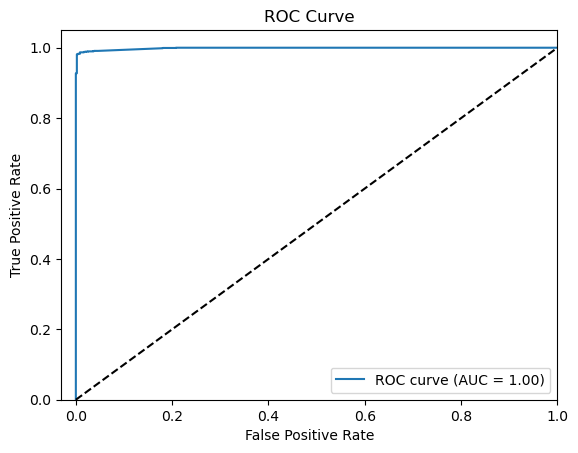

In [ ]:
# Plot the ROC Curve

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Make predictions on test dataset
y_scores = modelCV.predict(X_test).ravel()

# Calculate ROC curve
fprDNN, tprDNN, thresholdsDNN = roc_curve(y_test, y_scores)

# Calculate AUC
aucDNN = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fprDNN, tprDNN, label='ROC curve (AUC = %0.2f)' % aucDNN)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# #Extracting all Abnormal Classifications
ANM_X = []
ANM_Y = []

for row_index, (input, prediction, label) in enumerate(zip (X_test, DNN_pred, y_test)):
  if (prediction == 1) & (label == 1):
    print('Row', row_index, 'has been classified as ', prediction, 'and should be ', label)
    ANM_X.append(input)
    ANM_Y.append(y_test_later[row_index])
  elif (prediction == 0) & (label == 1):
    print('Row', row_index, 'has been classified as ', prediction, 'and should be ', label)
    ANM_X.append(input)
    ANM_Y.append(y_test_later[row_index])

In [ ]:
# machine learning model_pipeline for different classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append (SVC(probability=True))

model_pipeline.append(DecisionTreeClassifier ())
model_pipeline.append(RandomForestClassifier ())
model_pipeline.append(GaussianNB ( ))


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score




model_list=["Logistic Regression", 'SVM', 'Decision Tree', 'Random Forest','Naive Bayes']

result_ = pd.DataFrame(columns=['Model', 'fpr','tpr','auc'])

acc_list = []
cm_list = []
MSE = []
specificity = []
sensitivity = []
scores_avg = []
scores_std = []
cv_mean =[]

for model in model_pipeline:
  model.fit (X_train, y_train)
  BinClass_pred = model.predict (X_test)
  def calculate_sensitivity_BN (y_test, y_pred):
    tpos, fpos, fneg, tneg = confusion_matrix(y_test, BinClass_pred).ravel()
    sensitivity = tpos / (tpos + fneg)
    return sensitivity
  def calculate_specificity_BN (y_test, y_pred):
    tpos, fpos, fneg, tneg = confusion_matrix(y_test, BinClass_pred).ravel()
    specificity = tneg / (tneg + fpos)
    return specificity
  y_pred_prob = model.predict_proba(X_test)
  y_pred_prob = y_pred_prob[:,1]
  acc_list.append(metrics.accuracy_score(y_test, BinClass_pred))
  specificity.append(calculate_specificity_BN(y_test, BinClass_pred))
  scores_avg.append((cross_val_score(model, X, Y224, cv=5, scoring='f1_macro')).mean())
  scores_std.append((cross_val_score(model, X, Y224, cv=5, scoring='f1_macro')).std())
  cv_mean.append((cross_val_score(model, X, Y224, cv=5, scoring='f1_macro')))
  sensitivity.append(calculate_sensitivity_BN(y_test, BinClass_pred))
  cm_list.append(confusion_matrix(y_test, BinClass_pred))
  MSE.append(mean_squared_error(y_test, BinClass_pred))
  auc = roc_auc_score(y_test, y_pred_prob)
  fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
  result_ = result_.append({'Model':model_list,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)


result = pd.DataFrame ({"Model": model_list, "Accuracy":acc_list, "MSE":MSE, "sensitivity":sensitivity, "specificity":specificity,  "scores_avg":scores_avg, "scores_std":scores_std, "CV Mean":cv_mean })

C:\Users\Akinniyi\AppData\Local\Temp\ipykernel_21104\1305390036.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_ = result_.append({'Model':model_list,
C:\Users\Akinniyi\AppData\Local\Temp\ipykernel_21104\1305390036.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_ = result_.append({'Model':model_list,
C:\Users\Akinniyi\AppData\Local\Temp\ipykernel_21104\1305390036.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_ = result_.append({'Model':model_list,
C:\Users\Akinniyi\AppData\Local\Temp\ipykernel_21104\1305390036.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_ = result_.append({'Model':mode

In [ ]:
result = pd.DataFrame ({"Model": model_list, "Accuracy":acc_list, "MSE":MSE, "sensitivity":sensitivity, "specificity":specificity,  "scores_avg":scores_avg, "scores_std":scores_std})
result.append({'Model': 'MLP', "Accuracy":test_acc, "MSE":MSE_BN, "specificity":specificity_DNN_BN, "sensitivity":sensitivity_DNN_BN},  ignore_index=True)

C:\Users\Akinniyi\AppData\Local\Temp\ipykernel_21104\1506890978.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result.append({'Model': 'MLP', "Accuracy":test_acc, "MSE":MSE_BN, "specificity":specificity_DNN_BN, "sensitivity":sensitivity_DNN_BN},  ignore_index=True)


,Model,Accuracy,MSE,sensitivity,specificity,scores_avg,scores_std
0,Logistic Regression,0.935937,0.064062,0.870021,0.957727,0.892251,0.036699
1,SVM,0.935937,0.064062,0.858012,0.962859,0.903279,0.033833
2,Decision Tree,0.846354,0.153646,0.697168,0.893224,0.797335,0.035008
3,Random Forest,0.906250,0.093750,0.925287,0.902036,0.853057,0.024718
4,Naive Bayes,0.784375,0.215625,0.540365,0.947049,0.737089,0.127295
5,MLP,0.986458,0.013542,0.955466,0.997195,NaN,NaN


# ROC CURVE FOR BINARY

In [ ]:
result_

,Model,fpr,tpr,auc
0,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.16274238227146814, 0.18005540166204986...",0.974694
1,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0006925207756232687, 0.004155124653739...",0.979831
2,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.3277310924369748, 1.0]","[0.0, 0.9037396121883656, 1.0]",0.788004
3,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002...","[0.0, 0.03462603878116344, 0.08310249307479224...",0.970398
4,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.10504201680672269, 0.10504201680672269...","[0.0, 0.7326869806094183, 0.7333795013850416, ...",0.878890


In [ ]:
result_ = result_.append({'Model':'MLP',
                                        'fpr':fprDNN,
                                        'tpr':tprDNN,
                                        'auc':aucDNN}, ignore_index=True)

C:\Users\Akinniyi\AppData\Local\Temp\ipykernel_21104\4231214174.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_ = result_.append({'Model':'MLP',


In [ ]:
result_

,Model,fpr,tpr,auc
0,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.16274238227146814, 0.18005540166204986...",0.974694
1,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0006925207756232687, 0.004155124653739...",0.979831
2,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.3277310924369748, 1.0]","[0.0, 0.9037396121883656, 1.0]",0.788004
3,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002...","[0.0, 0.03462603878116344, 0.08310249307479224...",0.970398
4,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.10504201680672269, 0.10504201680672269...","[0.0, 0.7326869806094183, 0.7333795013850416, ...",0.878890
5,MLP,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.19182825484764543, 0.22022160664819945...",0.998614


In [ ]:
result_.index = ["Logistic Regression", 'SVM', 'Decision Tree', 'Random Forest','Naive Bayes', 'MLP']
result_

,Model,fpr,tpr,auc
Logistic Regression,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.16274238227146814, 0.18005540166204986...",0.974694
SVM,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0006925207756232687, 0.004155124653739...",0.979831
Decision Tree,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.3277310924369748, 1.0]","[0.0, 0.9037396121883656, 1.0]",0.788004
Random Forest,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002...","[0.0, 0.03462603878116344, 0.08310249307479224...",0.970398
Naive Bayes,"[Logistic Regression, SVM, Decision Tree, Rand...","[0.0, 0.10504201680672269, 0.10504201680672269...","[0.0, 0.7326869806094183, 0.7333795013850416, ...",0.878890
MLP,MLP,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.19182825484764543, 0.22022160664819945...",0.998614


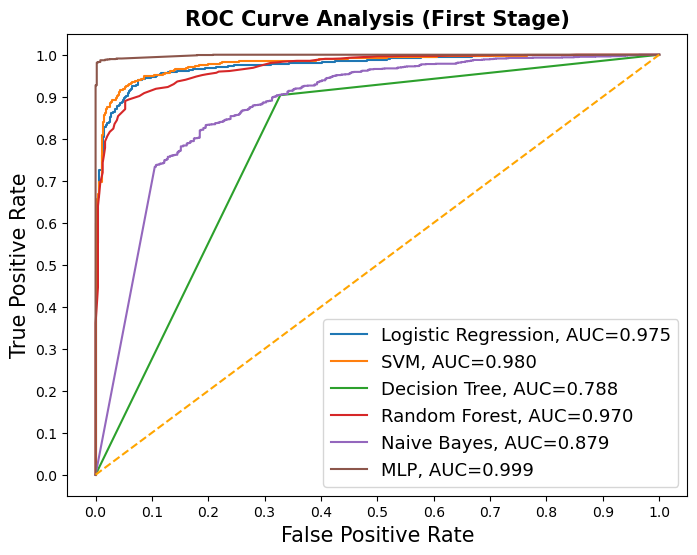

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_.index:
    plt.plot(result_.loc[i]['fpr'],
             result_.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis (First Stage)', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

fig.savefig('ROC_Curve_Binary_CV.png')

# CONFUSION MATRIX BINARY

In [ ]:
cm_list

[array([[ 415,   61],
        [  62, 1382]], dtype=int64),
 array([[ 423,   53],
        [  70, 1374]], dtype=int64),
 array([[ 320,  156],
        [ 139, 1305]], dtype=int64),
 array([[ 322,  154],
        [  26, 1418]], dtype=int64),
 array([[ 415,   61],
        [ 353, 1091]], dtype=int64)]

In [ ]:
confusion_matrix(y_test, DNN_pred)

array([[ 472,    4],
       [  22, 1422]], dtype=int64)

In [ ]:
cm_list.append(confusion_matrix(y_test, DNN_pred))

In [ ]:
cm_list

[array([[ 415,   61],
        [  62, 1382]], dtype=int64),
 array([[ 423,   53],
        [  70, 1374]], dtype=int64),
 array([[ 320,  156],
        [ 139, 1305]], dtype=int64),
 array([[ 322,  154],
        [  26, 1418]], dtype=int64),
 array([[ 415,   61],
        [ 353, 1091]], dtype=int64),
 array([[ 472,    4],
        [  22, 1422]], dtype=int64)]

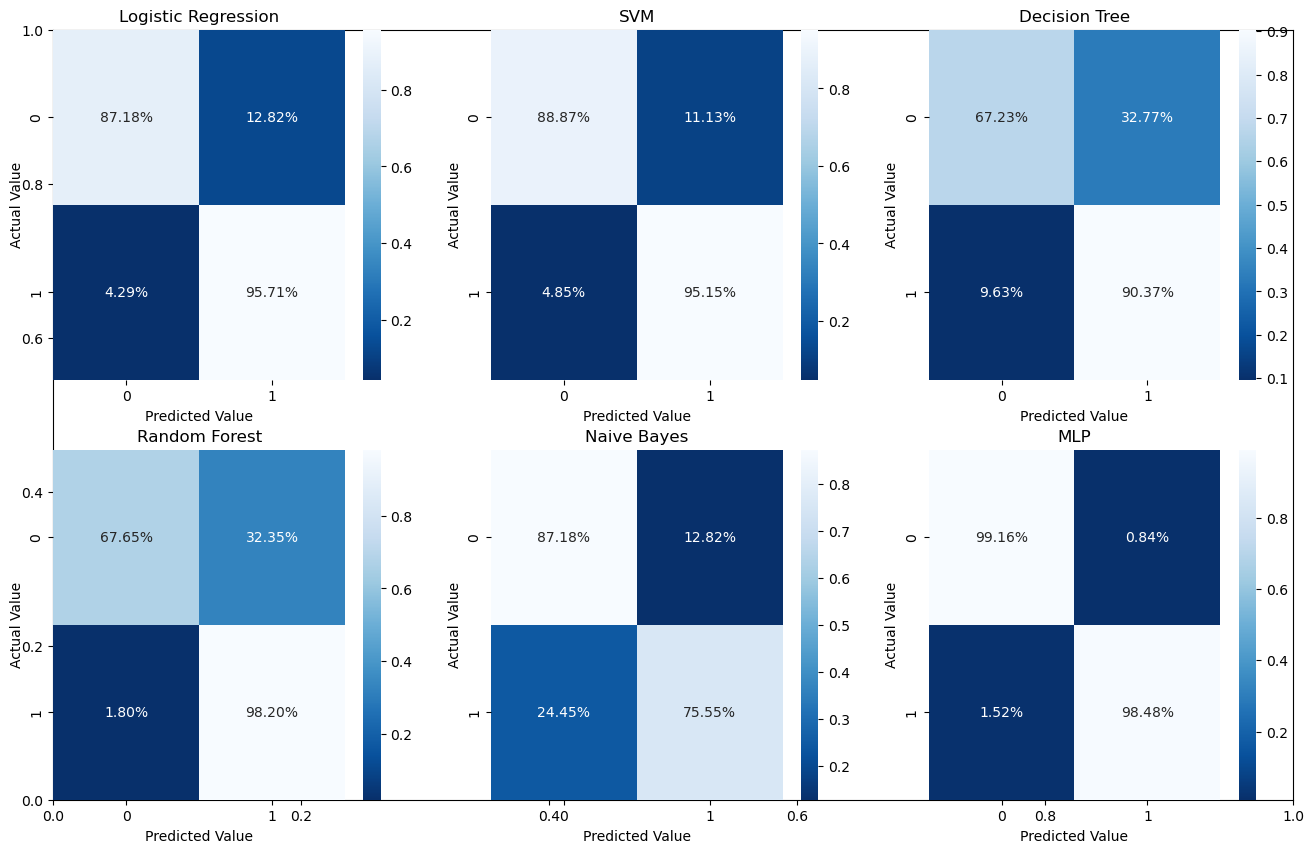

In [ ]:
# Plot confusion matrix

label = np.unique(y_train)
fig, ax = plt.subplots(figsize=(16, 10))
model_list_all=["Logistic Regression", 'SVM', 'Decision Tree', 'Random Forest','Naive Bayes', 'MLP']
for i in range (len(cm_list)):
  cm=cm_list[i]
  model = model_list_all[i]
  sub=fig.add_subplot(2,3,i+1).set_title(model)
  cm_sum = np.sum(cm, axis=1, keepdims=True)
  cm_plot=sns.heatmap(cm / cm_sum.astype(float), annot=True,
            fmt='.2%', cmap='Blues_r')
  cm_plot.set_xlabel("Predicted Value")
  cm_plot.set_ylabel("Actual Value")
  cm_plot.display_labels=["NORMAL", "Not NORMAL"]

fig.savefig('Confusion_Matrix_Binary_CV.png')